In [15]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [13]:
dev = qml.device("default.qubit", wires=1, shots=100, diff_method="parameter-shift")

@qml.qnode(dev)
def circuit(param):
    qml.RX(param, wires=0)
    return qml.expval(qml.PauliZ(wires=0))

circuit(0), circuit(0.1), circuit(0.3)

(array(1.), array(1.), array(0.96))

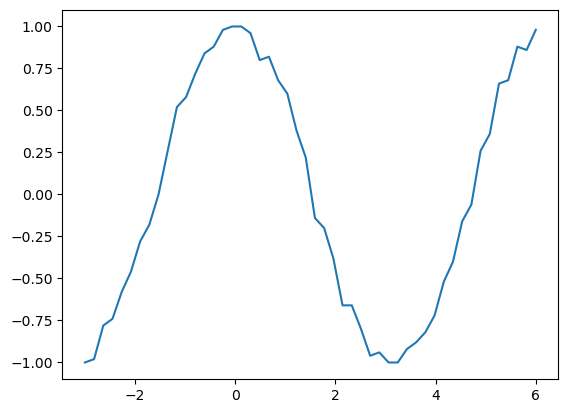

In [17]:
X = np.linspace(-3, 6, 50)

Y = [circuit(x) for x in X]
plt.plot(X, Y)

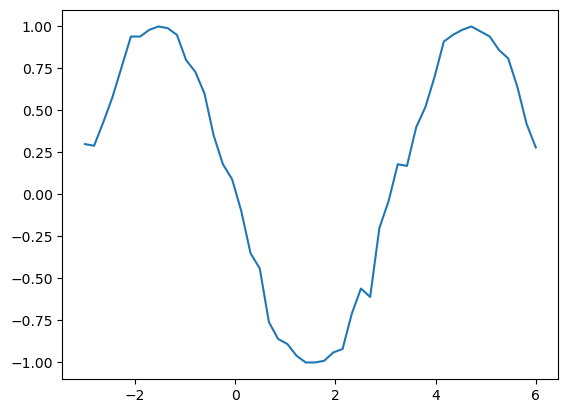

In [19]:
dY = []
for x in X:
    w = np.array([x], requires_grad=True)
    grad = qml.gradients.param_shift(circuit)(w)
    dY.append(grad[0])
    
plt.plot(X, dY)

Градиент для встроенной функции по семплированию считается приемлемо.

Проверим теперь для собственного гейта.

In [26]:
qml.matrix(qml.RX(0.2, wires=0))

array([[0.99500417+0.j        , 0.        -0.09983342j],
       [0.        -0.09983342j, 0.99500417+0.j        ]])

In [27]:
# my_rx
# можно создать свою схему вот так https://pennylane.ai/blog/2021/05/how-to-add-custom-gates-and-templates-to-pennylane/ , но я уже решил, что тут это и не надо, т.к. есть нормальные методы для создания более сложных гейтов в pennylane.
def U(param):
    return np.array([
        [np.cos(param/2), -1j*np.sin(param/2)],
        [-1j*np.sin(param/2), np.cos(param/2)]
    ])
qml.QubitUnitary(U, wires=0)


ValueError: Input unitary must be of shape (2, 2) or (batch_size, 2, 2) to act on 1 wires.

In [ ]:

@qml.qnode(dev)
def my_circuit(param):
    my_rx(param, wires=0)
    return qml.expval(qml.PauliZ(wires=0))

circuit(0), circuit(0.1), circuit(0.3)

(array(1.), array(1.), array(0.96))

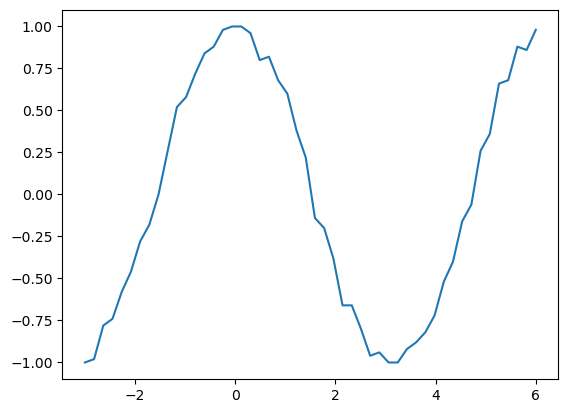

In [ ]:
X = np.linspace(-3, 6, 50)

Y = [circuit(x) for x in X]
plt.plot(X, Y)

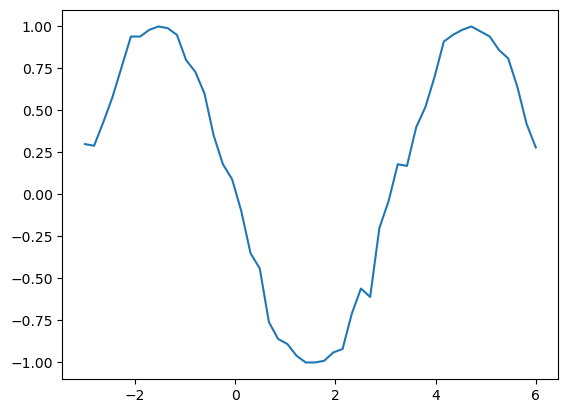

In [ ]:
dY = []
for x in X:
    w = np.array([x], requires_grad=True)
    grad = qml.gradients.param_shift(circuit)(w)
    dY.append(grad[0])
    
plt.plot(X, dY)